In [16]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

In [17]:
g_0 = 9.81 #m/s2
rho_0 = 1.225 #kg/m3

In [30]:
F = 1 #N
m = 1 #kg

In [20]:
step = 1
a = np.arange(0, 10000 + step, step)
a

array([    0,     1,     2, ...,  9998,  9999, 10000])

In [36]:
Ni = 100
dt = 0.1

lp = np.arange(0,Ni+1,1) #nr kroku czasowego
it = np.arange(0,Ni,1)    #iterator

results = np.zeros([Ni+1, 5]) #alokacja pamięci na wyniki
results[:, 0] = lp #wypełnienie zerowej kolumny


for i in it:
    results[i+1, 1] = results[i, 1] + dt
    results[i+1, 2] = results[i, 2] + (F/m)*dt
    results[i+1, 3] = results[i, 3] + results[i+1, 2]*dt


results

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-01, 1.000e-01, 1.000e-02, 0.000e+00],
       [2.000e+00, 2.000e-01, 2.000e-01, 3.000e-02, 0.000e+00],
       [3.000e+00, 3.000e-01, 3.000e-01, 6.000e-02, 0.000e+00],
       [4.000e+00, 4.000e-01, 4.000e-01, 1.000e-01, 0.000e+00],
       [5.000e+00, 5.000e-01, 5.000e-01, 1.500e-01, 0.000e+00],
       [6.000e+00, 6.000e-01, 6.000e-01, 2.100e-01, 0.000e+00],
       [7.000e+00, 7.000e-01, 7.000e-01, 2.800e-01, 0.000e+00],
       [8.000e+00, 8.000e-01, 8.000e-01, 3.600e-01, 0.000e+00],
       [9.000e+00, 9.000e-01, 9.000e-01, 4.500e-01, 0.000e+00],
       [1.000e+01, 1.000e+00, 1.000e+00, 5.500e-01, 0.000e+00],
       [1.100e+01, 1.100e+00, 1.100e+00, 6.600e-01, 0.000e+00],
       [1.200e+01, 1.200e+00, 1.200e+00, 7.800e-01, 0.000e+00],
       [1.300e+01, 1.300e+00, 1.300e+00, 9.100e-01, 0.000e+00],
       [1.400e+01, 1.400e+00, 1.400e+00, 1.050e+00, 0.000e+00],
       [1.500e+01, 1.500e+00, 1.500e+00,

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
g_0 = 9.81
rho_0 = 1.225
p_0 = 101325
T_0 = 300

In [39]:
S_0 = 0.15**2*np.pi/4
Cx_0 = 0.56

In [40]:
M_dry = 20
M_prop = 14

m_dot = 0.93 #kg/s

In [41]:
Thr_0 = 300*g_0

alpha_deg = 1
alpha_0 = alpha_deg * np.pi/180
i_hat_0 = np.sin(alpha_0)
j_hat_0 = np.cos(alpha_0)

In [42]:
Ni = 15000 #liczba iteracji
dt = 0.01 #Krok czasowy
lp = np.arange(0,Ni+1,1) #nr kroku czasowego
it = np.arange(0,Ni,1)    #iterator

results = np.zeros([Ni+1, 15]) #alokacja pamięci na wyniki
results[:, 0] = lp #wypełnienie zerowej kolumny

#warunki początkowe
results[0,:] = [0, 0, 0, 0, i_hat_0, j_hat_0, 0, 0, 0, (M_dry + M_prop), Thr_0, 0, Thr_0*i_hat_0, ((Thr_0*j_hat_0) - (M_dry+M_prop)*g_0), np.sqrt((Thr_0*i_hat_0)**2 + (Thr_0*j_hat_0)**2)]

#pętla Euler
for i in it:
    #spalanie paliwa
    if results[i, 9] > M_dry:
        results[i+1, 9] = results[i, 9] + (-1)*m_dot*dt
    else:
        results[i+1, 9] = M_dry
        
    #obliczenie ciągu
    if results[i, 9] > M_dry:
        results[i+1, 10] = Thr_0
    else:
        results[i+1, 10]=0

    results[i+1, 1] = results[i, 1] + dt    #wypełnienie czasu, kolumna 1
    results[i+1, 6] = results[i, 6] + results[i, 12]/results[i, 9]*dt    #szybkość x, kolumna 6 
    results[i+1, 7] = results[i, 7] + results[i, 13]/results[i, 9]*dt    #szybkość y, kolumna 7 
    results[i+1, 8] = np.sqrt(results[i+1, 6]**2 + results[i+1, 7]**2) # szybkość 
    results[i+1, 2] = results[i, 2] + (results[i+1, 6] - 0.5*results[i, 12]/results[i, 9]*dt)*dt    #przemieszczenie x  dx = (V_i - 0.5*F/M*dt) * dt
    results[i+1, 3] = results[i, 3] + (results[i+1, 7] - 0.5*results[i, 13]/results[i, 9]*dt)*dt    #przemieszczenie y  dy = (V_i - 0.5*F/M*dt) * dt
    results[i+1, 4] = results[i+1, 6]/results[i+1, 8] #kąt trajketorii
    results[i+1, 5] = results[i+1, 7]/results[i+1, 8] #kąt trajketorii
    
    #obliczenie wartości siły
    results[i+1, 11] = (0.5*rho_0*results[i+1, 8]**2)*S_0*Cx_0
    results[i+1, 12] = (results[i+1, 10]-results[i+1, 11])*results[i+1, 4]
    results[i+1, 13] = (results[i+1, 10]-results[i+1, 11])*results[i+1, 5] -1*(results[i+1, 9])*g_0
    results[i+1, 14] = np.sqrt(results[i+1, 12]**2 + results[i+1, 13]**2)
    
    if results[i+1, 3] < 0:
        break
    #results[i+1, 7] = results[i, 7] + (-1)*m_dot*dt
    
    
#print(np.array(["lp", "t", "x", "y", "i_hat", "j_hat", "Vx", "Vy", "V", "M", "T", "D", "Fx", "Fy", "F"]))

results = pd.DataFrame(results)
results.columns = ["lp", "t", "x", "y", "i_hat", "j_hat", "Vx", "Vy", "V", "M", "T", "D", "Fx", "Fy", "F_sum"]
results

,lp,t,x,y,i_hat,j_hat,Vx,Vy,V,M,T,D,Fx,Fy,F_sum
0,0.0,0.00,0.000000,0.000000,0.017452,0.999848,0.000000,0.000000,0.000000,34.0000,2943.0,0.000000,51.362432,2609.011767,2943.000000
1,1.0,0.01,0.000076,0.003837,0.019683,0.999806,0.015107,0.767356,0.767505,33.9907,2943.0,0.003571,57.926213,2608.977534,2609.620513
2,2.0,0.02,0.000312,0.015348,0.020940,0.999781,0.032148,1.534913,1.535249,33.9814,2943.0,0.014286,61.626619,2608.982873,2609.710611
3,3.0,0.03,0.000724,0.034536,0.021832,0.999762,0.050284,2.302681,2.303230,33.9721,2943.0,0.032154,64.250452,2609.000108,2609.791119
4,4.0,0.04,0.001321,0.061403,0.022529,0.999746,0.069196,3.070664,3.071443,33.9628,2943.0,0.057181,66.301504,2609.020804,2609.863108
5,5.0,0.05,0.002111,0.095950,0.023104,0.999733,0.088718,3.838863,3.839888,33.9535,2943.0,0.089372,67.994164,2609.041206,2609.927053
6,6.0,0.06,0.003098,0.138181,0.023596,0.999722,0.108744,4.607279,4.608562,33.9442,2943.0,0.128735,69.440196,2609.059291,2609.983204
7,7.0,0.07,0.004288,0.188097,0.024026,0.999711,0.129201,5.375911,5.377464,33.9349,2943.0,0.175276,70.705503,2609.073833,2610.031712
8,8.0,0.08,0.005684,0.245700,0.024410,0.999702,0.150037,6.144758,6.146589,33.9256,2943.0,0.229000,71.832325,2609.084029,2610.072672
9,9.0,0.09,0.007290,0.310993,0.024756,0.999694,0.171210,6.913818,6.915938,33.9163,2943.0,0.289914,72.849424,2609.089319,2610.106150


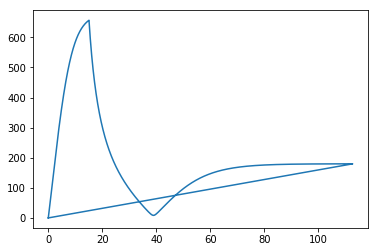

In [43]:
plt.plot(results["t"], results["V"])
plt.show()

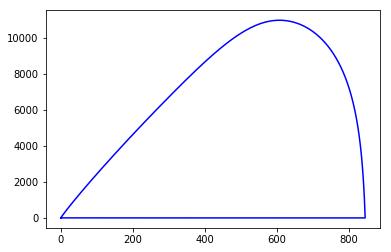

In [45]:
plt.plot(results["x"], results["y"], 'b-')
plt.show()